In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.drop(columns=['id'], inplace=True)  # Drop ID column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode labels
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred))

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [7]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



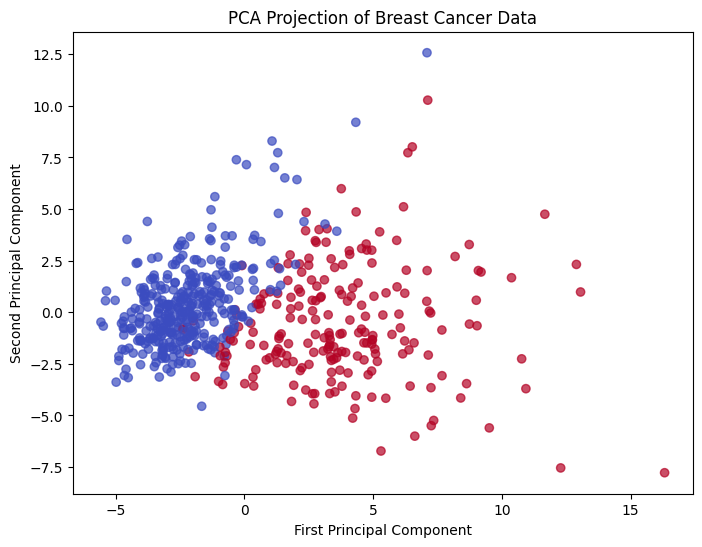

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("PCA Projection of Breast Cancer Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [9]:
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.show()

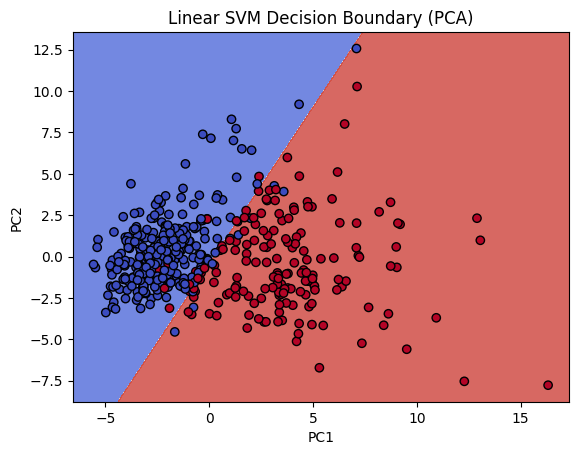

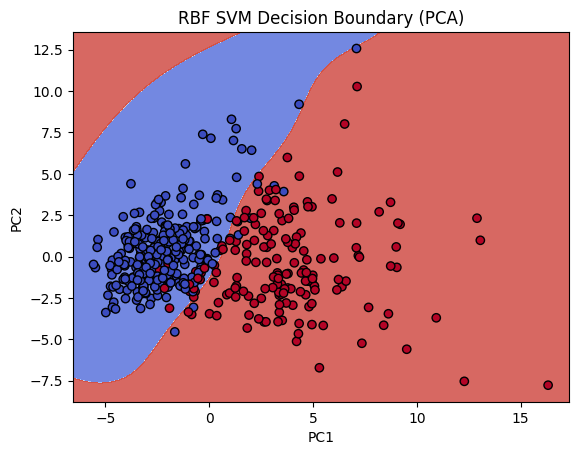

In [10]:
# Fit on PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
linear_svm_pca = SVC(kernel='linear', C=1)
linear_svm_pca.fit(X_train_pca, y_train_pca)
plot_decision_boundary(linear_svm_pca, X_train_pca, y_train_pca, "Linear SVM Decision Boundary (PCA)")

rbf_svm_pca = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm_pca.fit(X_train_pca, y_train_pca)
plot_decision_boundary(rbf_svm_pca, X_train_pca, y_train_pca, "RBF SVM Decision Boundary (PCA)")

In [11]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters found:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters found: {'C': 1, 'gamma': 'scale'}
Best cross-validation score: 0.97


In [12]:
best_svm = grid.best_estimator_
cv_scores = cross_val_score(best_svm, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.2f}".format(cv_scores.mean()))

Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV accuracy: 0.97
